# A Fraud Detection Project Using Text Data

## Important libraries

In [1]:
# pandas & numpy: Data manipulation and analysis
import numpy as np
import pandas as pd

# visualization: Data visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for enhancing data visualizations

# tokenization: Text processing and NLP libraries
import re  # Regular expressions for text pattern matching
import nltk  # The Natural Language Toolkit for various NLP tasks
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Stemming and Lemmatization
from nltk.corpus import stopwords  # Stopwords for text preprocessing
from nltk.tokenize import word_tokenize, sent_tokenize  # Tokenization methods
from nltk.stem.porter import PorterStemmer  # Porter Stemmer for word stemming
import string  # String manipulation

# Suppressing warnings to avoid clutter in output
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


## Loading & understanding our data

In [2]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\Dataset\Kaggle\Spam_Ham_data.csv")

# With "pd.set_option('display.max_columns', None)" we see all the columns of the dataset.
pd.set_option('display.max_columns', None)
df.head()


,email,label,Subject,content
0,b'From exmh-workers-admin@redhat.com Thu Aug ...,0.0,new sequenc window,date wed number aug number number number chri ...
1,b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,b'From Steve_Burt@cursor-system.com Thu Aug 2...,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...


In [3]:
df=df.drop('email',axis=1)
df

,label,Subject,content
0,0.0,new sequenc window,date wed number aug number number number chri ...
1,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...
...,...,...,...
3058,1.0,fwddirect market work number,stumbl greatest way market centuri undoubtedli...
3059,1.0,see compani sale sky rocket number,stumbl greatest way market centuri undoubtedli...
3060,1.0,number hour watch emmerci joke,frontpag numbermeta nameprogid vlinknumb align...
3061,1.0,make fortun ebay number,htmlbodi tr td p number rate work home busi bf...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    3063 non-null   float64
 1   Subject  3008 non-null   object 
 2   content  3059 non-null   object 
dtypes: float64(1), object(2)
memory usage: 71.9+ KB


In [5]:
df.isnull().sum()

label       0
Subject    55
content     4
dtype: int64

In [6]:
# Removing missing value present in content
df = df.dropna(subset=['content'], axis=0)

In [7]:
# fillna in Subject variable by space
df=df.fillna('')

In [8]:
#adding both variable into text , help us to examine both at once
df["text"]=df["Subject"]+' '+df["content"]

All the variables have the correct data type and the presence of some missing data is confirmed 

In [9]:
# Dropping the missing data from the dataset:
df=df.drop(['Subject','content'],axis=1)

In [10]:
#cheching if there is missing value
df.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
# Let's see how looks the first element of the new column "completed_text"
df['text'][0]

"new sequenc window date wed number aug number number number chri garrigu messageid can't reproduc errorfor repeat like everi time without failthi debug log pick happen number pickit exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number sequenc exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number sequenc number hitnumb mark number hitsnumb tkerror syntax error express int note run pick command hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number sequenc hitthat' number hit come obvious version nmh i'mus delta pick versionpick nmhnumber compil sun mar number number ict numberand relev part mhprofil delta mhparam pickseq sel listsinc pick command work sequenc actual theon that' explicit command line search popup theon come mhprofil get still use version code form day ago haven'tbeen abl reach cv repositori today local rout issu mail"

## Text Cleaning

As in the numerical databases, cleaning data is a crucial part of the text analysis, and the process has 4 steps:
    <ol>
  <li>Remove all Stopwords</li>
  <li>Lemanize your words</li>
  <li>Stem your words</li>
  <li>Tokenization</li>
</ol>

In [12]:
# Getting stopwords for English:
stop_words = set(stopwords.words('english')) # Create a set of English stop words for text preprocessing

In [13]:
# Define punctuations to exclude and lemmatizer:
exclude = set(string.punctuation)# Create a set of common punctuation marks and symbols for text preprocessing

In [14]:

def clean(text, stop_words):
    # Define the stop words set using NLTK's stopwords for English.
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation) 
    # Initialize the WordNet lemmatizer.
    lemma = WordNetLemmatizer()
    # Initialize the Porter Stemmer.
    porter = PorterStemmer()
    # Remove trailing whitespaces from the text.
    text = text.rstrip()
    # Replace any non-alphabet characters with a space in the text.
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Split the text into words, convert to lowercase, and filter based on conditions.
    # Conditions:
    # 1. The word is not in the stop words list.
    # 2. The word is not a digit.
    # 3. The word has a length greater than 3.
    stop_free = " ".join([i for i in text.lower().split() if ((i not in stop_words) and (not i.isdigit()) and len(i) > 3)])
    # Remove punctuation from the cleaned text.
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # Lemmatize the words in the cleaned text.
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    # Return the cleaned and processed text.
    return normalized

In [15]:
# Clean the emails in sample_df
text_clean=[]
for text in df['text']:
    text_clean.append(clean(text, stop_words).split())    

In [16]:
# Apply the function to the dataframe:
df['clean_text'] = text_clean

In [17]:
# Now we can compare the original column "completed_text" vs the column "clean_text" using the row 41100 from sample_df
# Completed_text:
df['text'][0]

"new sequenc window date wed number aug number number number chri garrigu messageid can't reproduc errorfor repeat like everi time without failthi debug log pick happen number pickit exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number sequenc exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number sequenc number hitnumb mark number hitsnumb tkerror syntax error express int note run pick command hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number sequenc hitthat' number hit come obvious version nmh i'mus delta pick versionpick nmhnumber compil sun mar number number ict numberand relev part mhprofil delta mhparam pickseq sel listsinc pick command work sequenc actual theon that' explicit command line search popup theon come mhprofil get still use version code form day ago haven'tbeen abl reach cv repositori today local rout issu mail"

In [18]:
# clean_text:
print(df['clean_text'][0])

['sequenc', 'window', 'date', 'number', 'number', 'number', 'number', 'chri', 'garrigu', 'messageid', 'reproduc', 'errorfor', 'repeat', 'like', 'everi', 'time', 'without', 'failthi', 'debug', 'pick', 'happen', 'number', 'pickit', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'rbrace', 'rbrace', 'number', 'sequenc', 'exec', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'rbrace', 'rbrace', 'number', 'sequenc', 'number', 'hitnumb', 'mark', 'number', 'hitsnumb', 'tkerror', 'syntax', 'error', 'express', 'note', 'pick', 'command', 'hand', 'delta', 'pick', 'inbox', 'list', 'lbrace', 'lbrace', 'subject', 'rbrace', 'rbrace', 'number', 'sequenc', 'hitthat', 'number', 'come', 'obvious', 'version', 'delta', 'pick', 'versionpick', 'nmhnumber', 'compil', 'number', 'number', 'numberand', 'relev', 'part', 'mhprofil', 'delta', 'mhparam', 'pickseq', 'listsinc', 'pick', 'command', 'work', 'sequenc', 'actual', 'theon', 'explicit', 'command', 'line', 'search', 'popup', 'theon', 

In [19]:
# Creating a new column named clean_sent where we join the words into a string.
df['clean_sent'] = df['clean_text'].apply(lambda x: " ".join(x))

In [20]:
# Let's see how the text looks like after the cleaning process.
df['clean_sent'][0]

'sequenc window date number number number number chri garrigu messageid reproduc errorfor repeat like everi time without failthi debug pick happen number pickit exec pick inbox list lbrace lbrace subject rbrace rbrace number sequenc exec pick inbox list lbrace lbrace subject rbrace rbrace number sequenc number hitnumb mark number hitsnumb tkerror syntax error express note pick command hand delta pick inbox list lbrace lbrace subject rbrace rbrace number sequenc hitthat number come obvious version delta pick versionpick nmhnumber compil number number numberand relev part mhprofil delta mhparam pickseq listsinc pick command work sequenc actual theon explicit command line search popup theon come mhprofil still version code form tbeen reach repositori today local rout issu mail'

In [21]:
df

,label,text,clean_text,clean_sent
0,0.0,new sequenc window date wed number aug number ...,"[sequenc, window, date, number, number, number...",sequenc window date number number number numbe...
1,0.0,cnet newscom cabl compani crack wifi htmlhead ...,"[cnet, newscom, cabl, compani, crack, wifi, ht...",cnet newscom cabl compani crack wifi htmlhead ...
2,0.0,save extra number ipaq number pda cnet shopper...,"[save, extra, number, ipaq, number, cnet, shop...",save extra number ipaq number cnet shopper htm...
3,0.0,zzzzteana alexand martin greek sculptor behind...,"[zzzzteana, alexand, martin, greek, sculptor, ...",zzzzteana alexand martin greek sculptor behind...
4,0.0,week deck texedit plu boom cnet download dispa...,"[week, deck, texedit, boom, cnet, download, di...",week deck texedit boom cnet download dispatchm...
...,...,...,...,...
3058,1.0,fwddirect market work number stumbl greatest w...,"[fwddirect, market, work, number, stumbl, grea...",fwddirect market work number stumbl greatest m...
3059,1.0,see compani sale sky rocket number stumbl grea...,"[compani, sale, rocket, number, stumbl, greate...",compani sale rocket number stumbl greatest mar...
3060,1.0,number hour watch emmerci joke frontpag number...,"[number, hour, watch, emmerci, joke, frontpag,...",number hour watch emmerci joke frontpag number...
3061,1.0,make fortun ebay number htmlbodi tr td p numbe...,"[make, fortun, ebay, number, htmlbodi, number,...",make fortun ebay number htmlbodi number rate w...


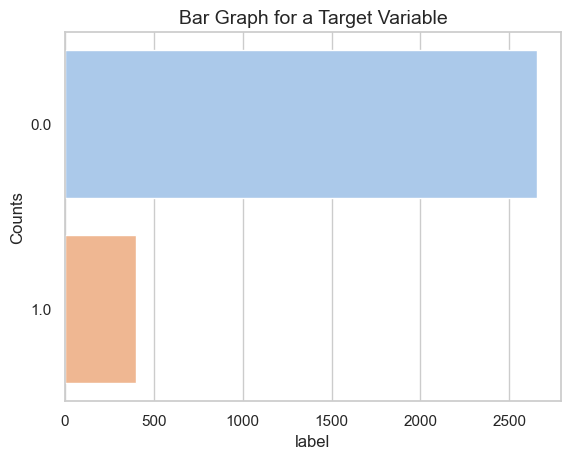

In [22]:
sns.set(style="whitegrid")
sns.set_palette("pastel")  # You can change the color palette here
# Create the bar plot
sns.countplot(y="label", data=df)
# Customize axis labels
plt.xlabel("label", fontsize=12)  # Change the x-axis label and its font size
plt.ylabel("Counts", fontsize=12)  # Change the y-axis label and its font size
# Add a title
plt.title("Bar Graph for a Target Variable", fontsize=14)
# Show the plot
plt.show()

In [23]:
#dividing dataframe into target and feature
x = df["clean_sent"]
y = df["label"]

In [24]:
# Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer object with a limit on the maximum number of features (words or terms) to consider,
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Use the fit_transform method of the TfidfVectorizer to compute the TF-IDF values for your input data 'x'.
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have your feature matrix X and target variable y
# x: Your feature matrix
# y: Your target variable

# Count the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Initialize the SMOTE resampler
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform oversampling
x_train_nb, y_train_nb = smote.fit_resample(x_train_nb, y_train_nb)

# Count the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_nb))


Class distribution before oversampling: Counter({0.0: 2658, 1.0: 401})
Class distribution after oversampling: Counter({0.0: 2137, 1.0: 2137})


In [27]:
results_df = pd.DataFrame(columns=[
    'Algorithm Name',
    'Accuracy',
    'Precision',
    'Recall',
    'F1 Score',
    'Confusion Matrix'
])

In [28]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_nb, y_train_nb)
y_pred_nb = naive_bayes.predict(x_test_nb)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test_nb, y_pred_nb))
print(classification_report(y_test_nb, y_pred_nb))

Multinomial Naive Bayes:
Accuracy: 0.9313725490196079
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       521
         1.0       0.70      0.96      0.81        91

    accuracy                           0.93       612
   macro avg       0.84      0.94      0.88       612
weighted avg       0.95      0.93      0.94       612



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classification metrics
algorithm_name = 'Multinomial Naive Bayes'
accuracy = accuracy_score(y_test_nb, y_pred_nb)
precision = precision_score(y_test_nb, y_pred_nb)
recall = recall_score(y_test_nb, y_pred_nb)
f1 = f1_score(y_test_nb, y_pred_nb)
conf_matrix = confusion_matrix(y_test_nb, y_pred_nb)

# Print the classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Append results to a DataFrame (assuming you have initialized results_df as in previous examples)
results_df = results_df.append({
    'Algorithm Name': algorithm_name,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': conf_matrix
}, ignore_index=True)


Accuracy: 0.9313725490196079
Precision: 0.696
Recall: 0.9560439560439561
F1 Score: 0.8055555555555556
Confusion Matrix:
[[483  38]
 [  4  87]]


In [31]:
max_words = 10000         # Maximum number of unique words in the vocabulary
max_sequence_length = 200 # Maximum length of input sequences (number of words in each sequence)
embedding_dim = 100      # Dimensionality of word embeddings

In [32]:
import tensorflow as tf  # Import TensorFlow
from tensorflow.keras.models import Sequential  # Import Sequential model
from tensorflow.keras.layers import Embedding, LSTM, Dense  # Import layers
from tensorflow.keras.preprocessing.text import Tokenizer  # Import text Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import sequence padding
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from scikit-learn

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)

In [33]:
x_seq = tokenizer.texts_to_sequences(x)  # Tokenize input text data and x_padded ensures consistent sequence length
x_padded = pad_sequences(x_seq, maxlen=max_sequence_length)  

In [34]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [35]:
x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(x_padded, y_encoded, test_size=0.2, random_state=42)

In [36]:
# Create a Sequential model
model = Sequential()

# Add an Embedding layer for word embeddings
# input_dim: Size of the vocabulary (number of unique words)
# output_dim: Dimensionality of the word embeddings
# input_length: Length of input sequences (number of words in each sequence)
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))

# Add an LSTM (Long Short-Term Memory) layer with 64 units
model.add(LSTM(64))

# Add a Dense layer with a single output unit and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_rnn, y_train_rnn, validation_data=(x_test_rnn, y_test_rnn), epochs=10, batch_size=64)

Epoch 1/10
39/39 [==============================] - 10s 187ms/step - loss: 0.4175 - accuracy: 0.8700 - val_loss: 0.2377 - val_accuracy: 0.9003
Epoch 2/10
39/39 [==============================] - 7s 174ms/step - loss: 0.1069 - accuracy: 0.9665 - val_loss: 0.0954 - val_accuracy: 0.9706
Epoch 3/10
39/39 [==============================] - 6s 163ms/step - loss: 0.0362 - accuracy: 0.9926 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 4/10
39/39 [==============================] - 7s 172ms/step - loss: 0.0192 - accuracy: 0.9959 - val_loss: 0.0917 - val_accuracy: 0.9788
Epoch 5/10
39/39 [==============================] - 7s 176ms/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 0.0915 - val_accuracy: 0.9755
Epoch 6/10
39/39 [==============================] - 7s 177ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.0929 - val_accuracy: 0.9771
Epoch 7/10
39/39 [==============================] - 7s 179ms/step - loss: 0.0085 - accuracy: 0.9988 - val_loss: 0.0849 - val_accuracy: 0.9739
Epoch

In [38]:
# Applying a threshold of 0.5 to the probabilities to get binary class predictions
# Values greater than 0.5 are assigned the label 1 (positive)
#values less than or equal to 0.5 are assigned the label 0 (negative).
y_pred_rnn = (model.predict(x_test_rnn) > 0.5).astype("int32")

20/20 [==============================] - 1s 36ms/step


In [39]:
print("Recurrent Neural Network (RNN):")
print("Accuracy:", accuracy_score(y_test_rnn, y_pred_rnn))
print(classification_report(y_test_rnn, y_pred_rnn))

Recurrent Neural Network (RNN):
Accuracy: 0.9803921568627451
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       521
           1       0.99      0.88      0.93        91

    accuracy                           0.98       612
   macro avg       0.98      0.94      0.96       612
weighted avg       0.98      0.98      0.98       612



In [40]:
algorithm_name = 'Recurrent Neural Network (RNN)'
accuracy = accuracy_score(y_test_rnn, y_pred_rnn)
precision = precision_score(y_test_rnn, y_pred_rnn)
recall = recall_score(y_test_rnn, y_pred_rnn)
f1 = f1_score(y_test_rnn, y_pred_rnn)
conf_matrix = confusion_matrix(y_test_rnn, y_pred_rnn)

# Print the classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Append results to a DataFrame (assuming you have initialized results_df as in previous examples)
results_df = results_df.append({
    'Algorithm Name': algorithm_name,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Confusion Matrix': conf_matrix
}, ignore_index=True)

Accuracy: 0.9803921568627451
Precision: 0.9876543209876543
Recall: 0.8791208791208791
F1 Score: 0.9302325581395348
Confusion Matrix:
[[520   1]
 [ 11  80]]


In [41]:
results_df

,Algorithm Name,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Multinomial Naive Bayes,0.931373,0.696000,0.956044,0.805556,"[[483, 38], [4, 87]]"
1,Recurrent Neural Network (RNN),0.980392,0.987654,0.879121,0.930233,"[[520, 1], [11, 80]]"


In [42]:
#TN|FP
#FN|TP